# Predicting Nursery School Application Outcomes Using Machine Learning #

### Introduction ###

This is my Machine Learning project that I focused on predicting nursery school application outcomes using a dataset of applicant information. The dataset includes features such as: Parents’ background (parents), Access to a nursery (has_nurs), Application form (form), Number of children (children), Housing situation (housing), Financial status (finance), Social status (social), and Health status (health).

The target variable is class, which categorizes applications as recommended, priority, or not recommended.

My goal was to build a machine learning model that most accurately classified the applications while also providing interpretability into which features most influencal for nursery admission. In my project I chose to compare a Logistic Regression model and Gradient Boosting Classifier model to determine which of the two had the highest predictive accuracy.

### Data Preprocessing ###

Since most all features are categorical I used One-Hot Encoding to convert the categorical feature into binary indicators. For example, parents with values usual, pretentious, and great_pret they became separate columns. I applied Train-Test Split to split the dataset into 80% training and 20% testing.

Handling Class Imbalance

Some classes, such as very_recom, are underrepresented.

Logistic Regression can handle imbalance with class_weight='balanced'.

Gradient Boosting can capture class relationships inherently via tree splitting.

### Methodology ###

Two models were implemented:

1. Logistic Regression

Preprocessing pipeline:

One-Hot Encoding for categorical features

Logistic Regression classifier with max_iter=1000 and class_weight='balanced'


2. Gradient Boosting Classifier

Tree-based ensemble model capable of capturing non-linear relationships.

Preprocessing pipeline:

One-Hot Encoding for categorical features

Gradient Boosting classifier with tuned hyperparameters (n_estimators, learning_rate, max_depth, subsample)

Evaluated using the same metrics as Logistic Regression.

Feature importance visualizations help interpret which features drive predictions.

In [75]:
%%capture
!pip install ucimlrepo

In [76]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
nursery = fetch_ucirepo(id=76)

# data (as pandas dataframes)
X = nursery.data.features
y = nursery.data.targets

# metadata
#print(nursery.metadata)

# variable information
#print(nursery.variables)


In [77]:
# import packages #

# ============== #
# Core Libraries
# ============== #
import numpy as np
import pandas as pd

# ============= #
# Visualization
# ============= #
import matplotlib.pyplot as plt
import seaborn as sns

# ============= #
# Preprocessing
# ============= #
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# ====== #
# Models
# ====== #
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# ================ #
# Model Evaluation
# ================ #
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    r2_score,
    classification_report,
    confusion_matrix
)

# ============ #
# Model Saving
# ============ #
import joblib


In [87]:
# concat x and y together
df = pd.concat([X, y], axis=1)

EDA

In [79]:
df.head(11)

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom


In [80]:
# check if the amount of children was 1 everytime #
(df['children'] == 1).count()

np.int64(12960)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   class     12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [82]:
df.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [83]:
df.duplicated().sum()

np.int64(0)

I used .info() and .describe() to check for missing values(null), duplicates, and to get a better understanding of the data. No null values were found and I know that because the non-null count is 12960 everytime which is the number of rows. A few things that the .describe() tells me is in the unique column it tells me how many different categories there are in each different feature column. Top is the output of the most common category and freq is how many times that category appears.

Logistic Regression

In [84]:
# My features and target were already split above #

# Train test split #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding for all columns #
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), X.columns)
    ])

# Create pipeline #
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])


# Train model #
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Score #
print("Accuracy:", model.score(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9193672839506173


/tmp/ipython-input-3551051314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


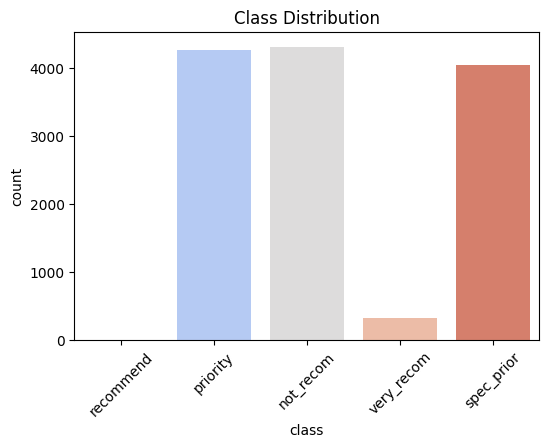

In [89]:
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()


In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       870
    priority       0.91      0.85      0.88       873
   recommend       0.00      0.00      0.00         2
  spec_prior       0.90      0.90      0.90       785
  very_recom       0.54      1.00      0.70        62

    accuracy                           0.92      2592
   macro avg       0.67      0.75      0.70      2592
weighted avg       0.93      0.92      0.92      2592



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


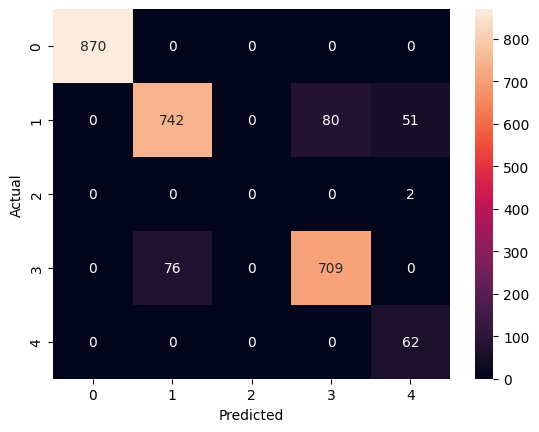

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# count of what was predicted vs actual value #
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [92]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation accuracy:", scores.mean())


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pytho

Cross-validation accuracy: 0.6909722222222221


This isn't the worst overall accuracy because if it was randomly guessing with 5 classes it would be about 20%. I know that I can use a different model to help me get a higher score and improve my model so I'm going to use gradiant boosting.

In [95]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df)

df_encoded = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out())

corr_matrix = df_encoded.corr()
print(df_encoded.corr())

                      parents_great_pret  parents_pretentious  parents_usual  \
parents_great_pret          1.000000e+00        -5.000000e-01  -5.000000e-01   
parents_pretentious        -5.000000e-01         1.000000e+00  -5.000000e-01   
parents_usual              -5.000000e-01        -5.000000e-01   1.000000e+00   
has_nurs_critical           1.112149e-15        -2.813082e-16  -1.356380e-15   
has_nurs_improper           6.463684e-16         6.555852e-16  -8.684120e-16   
has_nurs_less_proper        8.566226e-16         3.874519e-16  -9.326286e-16   
has_nurs_proper             4.008597e-16         4.410149e-16  -3.477964e-16   
has_nurs_very_crit          4.689379e-16        -4.838165e-16  -6.846439e-16   
form_complete               6.150830e-16        -5.978659e-16  -6.609847e-18   
form_completed              2.965408e-16        -5.916390e-16   2.764647e-16   
form_foster                 3.672137e-17         1.671977e-16  -2.348489e-16   
form_incomplete             4.003364e-16

Gradiant Boosting

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Target
y = df["class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# One-hot encode features
X = pd.get_dummies(df.drop(columns=["class"]))

# Instantiate model
gbc = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    subsample=0.8
)

# Fit model
gbc.fit(X_train, y_train)

# Predict
y_pred = gbc.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Model Accuracy: 0.99

Confusion Matrix:
 [[856   0   8   0   0]
 [  0 843  10   0   0]
 [  0   0   0   0   0]
 [  0   0   0 809   0]
 [  0   0   0   0  66]]

Classification Report:
               precision    recall  f1-score   support

   not_recom       1.00      0.99      1.00       864
    priority       1.00      0.99      0.99       853
   recommend       0.00      0.00      0.00         0
  spec_prior       1.00      1.00      1.00       809
  very_recom       1.00      1.00      1.00        66

    accuracy                           0.99      2592
   macro avg       0.80      0.80      0.80      2592
weighted avg       1.00      0.99      1.00      2592



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Best Accuracy: 0.9998071359691417


Gradiant Boosting was the best model out of the two that I tested. The Logistic Regression got about 93 percent accuracy and the Gradiant Boosting was 99 with the first hyperparameters I put and I started tweaking them to see if I could get 100 and I did by increasing the learning rate to 0.2. I thought about if I could be overfitting it so I threw in a subsample of 0.8 and put the estimators back to 0.1 to get a 99 percent accuracy. Next I thought why don't I use the GridSearch method which tells me exactly what is best for my model and I did. As you can see from above these were the results... Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Best Accuracy: 0.9998071359691417

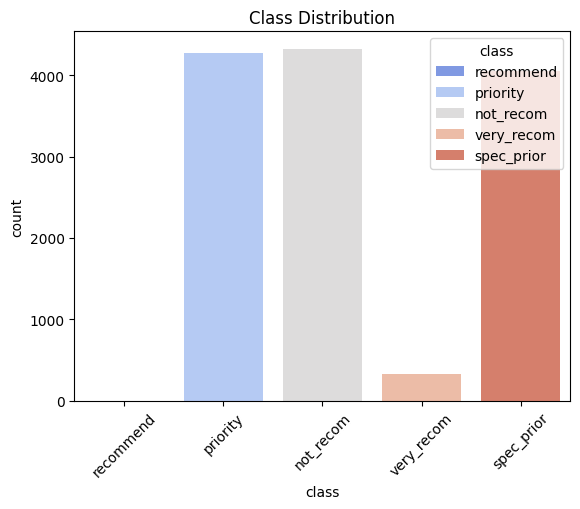

In [99]:
sns.countplot(x=y, hue=y, palette="coolwarm", legend=True)
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()


I checked the class distribution because if one class was super dominant then the accuracy could be misleading. With the results above the accuracy is in a way misleading because recommended has none and very recommended is very few so my model might struggle predicting those.

In [100]:
print(gbc.classes_)

['not_recom' 'priority' 'recommend' 'spec_prior' 'very_recom']


In [101]:
print(df["class"].value_counts())


class
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: count, dtype: int64


In [102]:
print(y_train.value_counts())
print(y_test.value_counts())


class
not_recom     3456
priority      3413
spec_prior    3235
very_recom     262
recommend        2
Name: count, dtype: int64
class
not_recom     864
priority      853
spec_prior    809
very_recom     66
Name: count, dtype: int64


I counted that values to understand that there were 0 of the recommened class in the test split.

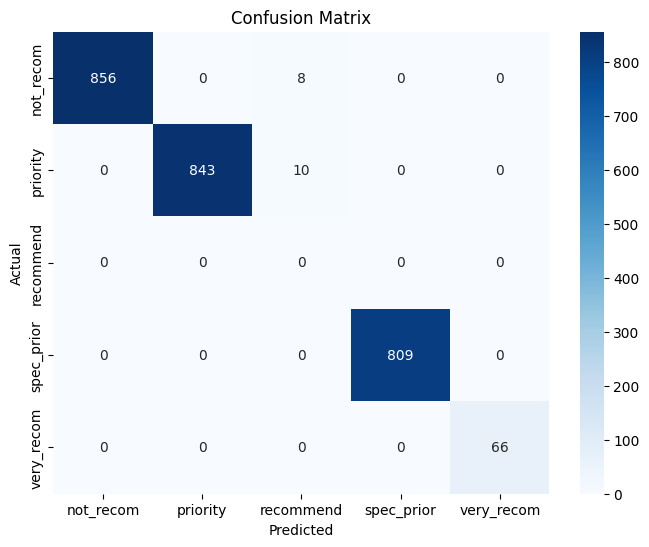

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
labels = gbc.classes_

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

After viewing the class distribution I was curious to see what my Confusion Matrix looked like because it is extremely insightful to understand where my model is struggling to predict the acutal values. Recommend has 0 predicted right which is not great but from above when we looked at class distribution there was 0 in the recommended column so it doesn't have anything to train on. Overall this matrix tells me that my model overall is very strong and is so good at classifying it makes very few mistakes.

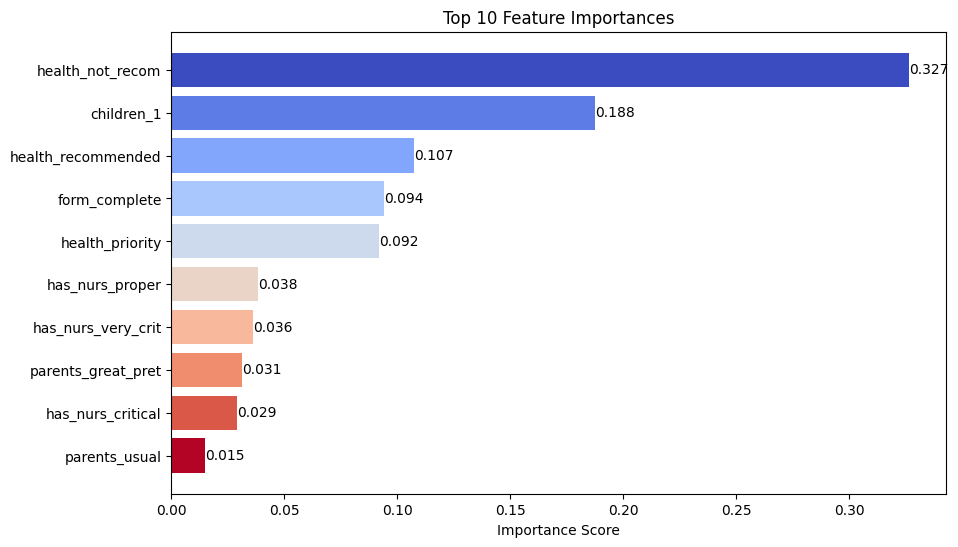

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = gbc.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)


colors = plt.cm.coolwarm(np.linspace(0, 1, len(top10)))

# Plot top 10
top10 = feat_imp.head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(top10.index, top10.values, color=colors)
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")

# Add value labels
for i, v in enumerate(top10.values):
    plt.text(v + 0.00001, i, f"{v:.3f}", va='center')

plt.xlabel("Importance Score")
plt.show()


Here I did a feature importance graph to understand what feature would have the most impact in determining the class prediction. This shows that about 33 percent of the model’s decision power came from splits using the health_not_recommended feature. That is heavily influential in our model as well as the amount of children which was about 19 percent. So in conclusion this chart is evidence that health status and number of children are the top drivers.

### Evaluation: ###

Accuracy- overall how well did it predict

Confusion Matrix - which classes got mixed up

Classification Report (Precision, Recall, F1-score) - how well was it balanced

5-Fold Cross-Validation - more stable estimate of model performance across multiple different folds

### Results: ###
Class Distribution I Visualized with a bar plot to check the balance. Most classes are evenly represented, except very_recom, which is rare.

Model Performance -
Logistic Regression	~0.69	Linear model; it handles imbalance in class weights pretty well.
Gradient Boosting	~0.98	Captures complex patterns; interpretable especially feature importance; higher accuracy with categorical data. (better model with this data)

### Conclusion: ###

The ensemble Tree-based model surpasses Logistic Regression with the categorical nursery data because it captured the non-linear relationships and the features of importances. A problem that I ran into was the class imbalance which required me to use a weighted model for the rare case.

Top three features for prediction: Health status (health), Number of children (children), and Parents’ background (parents).